<a href="https://colab.research.google.com/github/franklinhamer2727/PDE-machine-Learning/blob/main/Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---


In [2]:
import sklearn
assert sklearn.__version__>="020"
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

import warnings
warnings.filterwarnings(action="ignore",message="internal gelsd")

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Regresión Logística</a>  
6. <a href="#item34">Elastic Net</a>  

</font>
</div>

<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo 
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


In [3]:
data =pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.shape


(891, 12)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
import seaborn as sns
sns.set(style="whitegrid",color_codes =True)
sns.set(rc ={'figure.figsize':(10,6)})

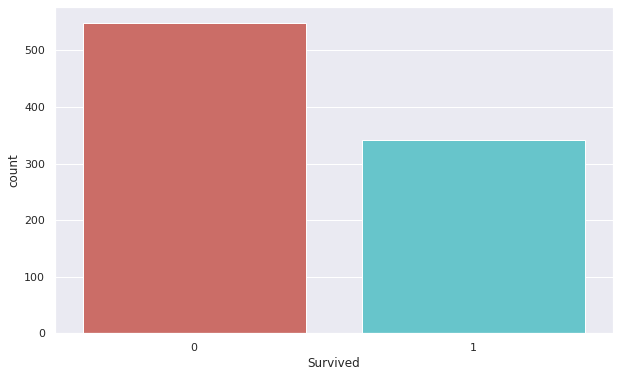

In [9]:
#Analizando el target
sns.countplot(x='Survived',data=data,palette ='hls')

#Analizando las varibales categoricas


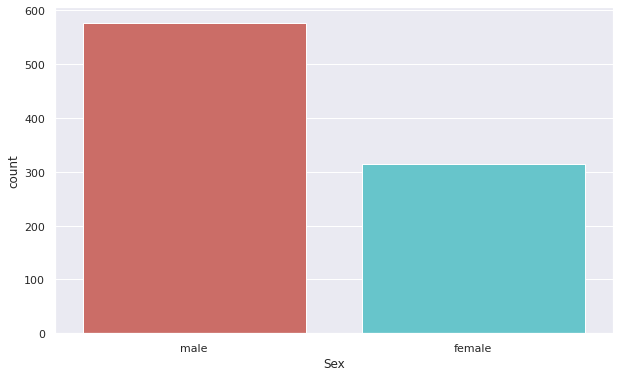

In [11]:
sns.countplot(x='Sex',data =data,palette='hls')


In [12]:
data.groupby(['Sex']).agg({"PassengerId":"count", "Survived":"mean"}).reset_index()

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


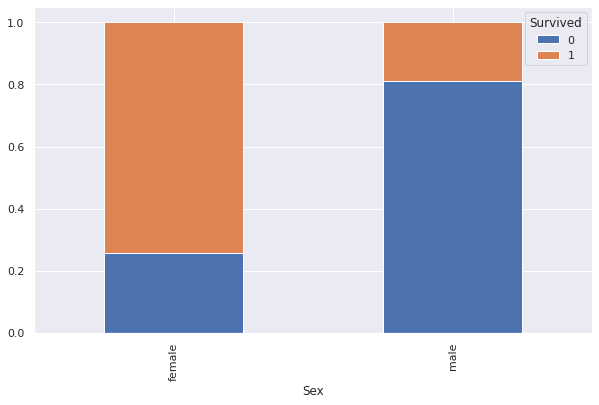

In [13]:
table= pd.crosstab(data.Sex,data.Survived)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

#Analisis de varibales numéricas


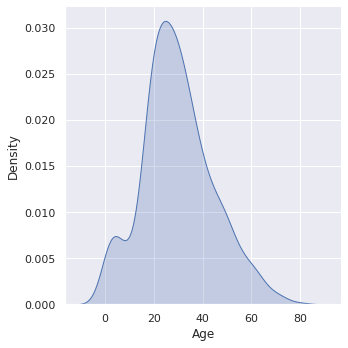

In [17]:
sns.displot(data,x="Age",kind ="kde",fill=True)

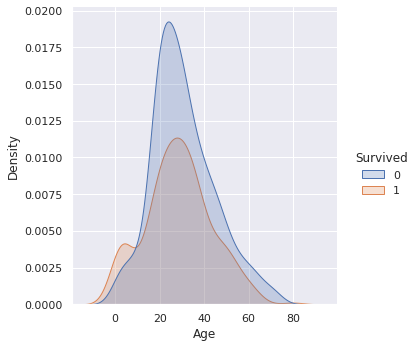

In [20]:
sns.displot(data, x="Age",hue="Survived",kind="kde",fill=True)

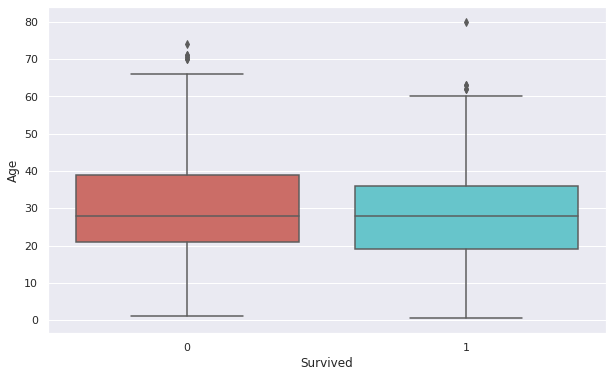

In [23]:
ax =sns.boxplot(x ="Survived",y ="Age",data=data,palette="hls")
ax

In [24]:
data['Fare'].fillna(data['Fare'].mean())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [25]:
data['Fare'].apply(lambda x:1 if x<100 else 2)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Fare, Length: 891, dtype: int64

In [28]:
#Discretizar la variable
from sklearn.preprocessing import KBinsDiscretizer
data['Fare_cat'] =KBinsDiscretizer(n_bins =20,
                                   encode ='ordinal',
                                   strategy="quantile").fit_transform(data[['Fare']])

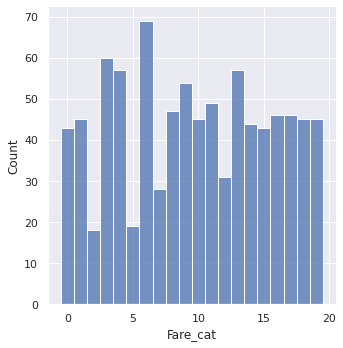

In [29]:
sns.displot(data['Fare_cat'],palette='hls',discrete =True)

In [30]:
data[['Fare', 'Fare_cat', 'Survived']]

,Fare,Fare_cat,Survived
0,7.2500,1.0,0
1,71.2833,17.0,1
2,7.9250,5.0,1
3,53.1000,16.0,1
4,8.0500,6.0,0
...,...,...,...
886,13.0000,9.0,0
887,30.0000,14.0,1
888,23.4500,12.0,0
889,30.0000,14.0,1


In [31]:
aggregations = {'Survived':'mean', 'Fare':'min', 'Fare':'max'}
res = data.groupby('Fare_cat').agg(aggregations).reset_index()
res

,Fare_cat,Survived,Fare
0,0.0,0.069767,7.1417
1,1.0,0.200000,7.5208
2,2.0,0.277778,7.7417
3,3.0,0.316667,7.8292
4,4.0,0.140351,7.8958
5,5.0,0.473684,8.0292
6,6.0,0.130435,8.8500
7,7.0,0.178571,10.4625
8,8.0,0.489362,12.8750
9,9.0,0.388889,14.4000


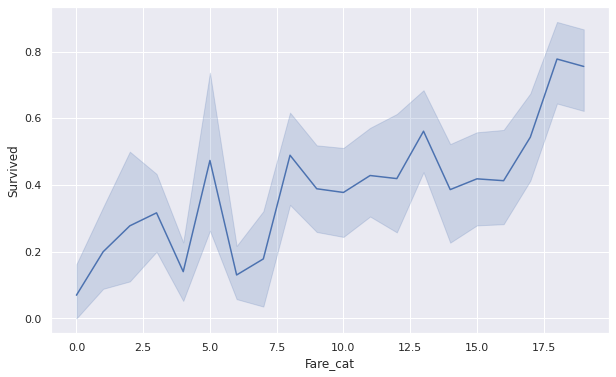

In [32]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_cat", y="Survived", palette = 'hls')

#Analisis multivariado

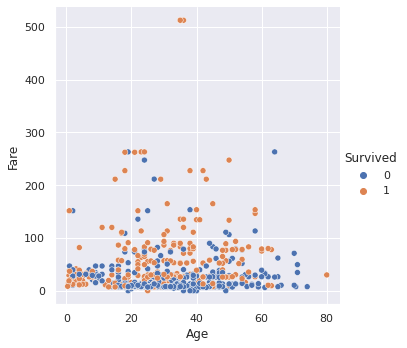

In [35]:
#sobrevivientes es 1 y no sobrevivientes es cero
#edad vs precios
sns.relplot(data=data,x="Age",y ="Fare",hue="Survived")

#Tratamiento de Variables

In [36]:
numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [37]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Fare_cat       float64
dtype: object

In [38]:
data['Pclass'] = data['Pclass'].astype('object')#convierto un int64 a objeto

In [40]:
data[catFeatures].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


#Encoding de variables categóricas

---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada categoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---
<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---

In [41]:
data.Sex.drop_duplicates()

0      male
1    female
Name: Sex, dtype: object

In [42]:
data[catFeatures].fillna('missing', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [43]:
# Reemplazar las filas NaN por una categoría específica para missings 
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [44]:
data[catFeatures].drop_duplicates().shape

(19, 3)

<h3>One Hot Encoding</h3> 

In [45]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder =OneHotEncoder()
dummyCols = ['Sex_dum'+str(x) for x in range(len(data['Sex'].drop_duplicates()))]
data[dummyCols] =OneHotEncoder.fit_transform(data[['Sex']]).toarray()
data[['Sex']+dummyCols].head(10)

,Sex,Sex_dum0,Sex_dum1
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0
5,male,0.0,1.0
6,male,0.0,1.0
7,male,0.0,1.0
8,female,1.0,0.0
9,female,1.0,0.0


In [46]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.2 MB/s 


In [47]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cat,Sex_dum0,Sex_dum1,Pclass_num,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,1.0,0.242363,0.188908,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17.0,1.0,0.0,0.629630,0.742038,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,1.0,0.0,0.242363,0.742038,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,16.0,1.0,0.0,0.629630,0.742038,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6.0,0.0,1.0,0.242363,0.188908,0.336957


In [49]:
data[['Sex','Sex_num']].drop_duplicates()


,Sex,Sex_num
0,male,0.188908
1,female,0.742038


In [50]:
data[['Pclass','Pclass_num']].drop_duplicates()

,Pclass,Pclass_num
0,3,0.242363
1,1,0.629630
9,2,0.472826


In [51]:
data[numFeatures]


,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,0
888,NaN,23.4500,1,2
889,26.0,30.0000,0,0
